# 3. k-Means Clustering
In this lab, we will code the k-means clustering algorithm from scratch. We will perform k-means clustering on a toy dataset - iris.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import os, sys
import matplotlib.pyplot as plt

np.random.seed(1)

iris =datasets.load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

class kmeans:
    def __init__(self, X, k=3, iters=1000):
        self.X       = X
        self.k       = k
        self.iters   = iters
        self.m       = X.shape[0]
        self.n       = X.shape[1]
        self.centers = np.random.randn(self.k, self.n)
        self.minIdx  = None
        self.costVal = 0.

    
    def fit(self):
        for _ in range(self.iters):
            # Step 1: Assign each data point to the nearest cluster
            dist2centers = distance.cdist(self.X, self.centers, 'euclidean')
            self.minIdx = np.argmin(dist2centers, axis=1)
            
            # Step 2: Update the cluster centers using the mean of the data points
            for i in range(self.k):
                cluster_point=self.X[self.minIdx == i]
                if len(cluster_point)>0:
                    self.centers[i] = np.mean(cluster_point, axis=0)
            
        return self.minIdx
    
    def costFcn(self):
        for i in range(self.k):
            centers = self.centers[i].reshape((1, self.n))
            cluster_distance = distance.cdist(self.X[self.minIdx==i], centers)
            self.costVal += np.sum(np.square(cluster_distance))
        return self.costVal

In [2]:
# Example usage:
kmeans_model = kmeans(X, k=3, iters=1000)
minIdx = kmeans_model.fit()
cost = kmeans_model.costFcn()
print("Final cluster assignments:", minIdx)
print("Final cost function value:", cost)

Final cluster assignments: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
Final cost function value: 139.8204963597498


In the following, we will test the k-means algorithm on the iris dataset. We will use the elbow method to find the optimal number of clusters. The elbow method is a heuristic used to determine the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use. The explained variation is the percentage of variance that is explained by the number of clusters. The following code will plot the explained variation as a function of the number of clusters.

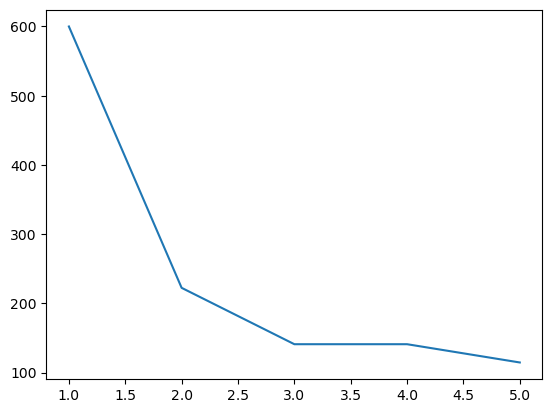

In [3]:
y_var = []
for i in range(1, 6):
    myKM = kmeans(X, k=i)
    myKM.fit()
    y_var.append(myKM.costFcn())
x_axis = [x for x in range(1, 6)]
plt.plot(x_axis, y_var)
plt.show()

After you finish the code, you should create a new folder at the `lab/` directory called `lab3` and save the file as `lab3.md`. 
In `lab3.md`, write down the number k that you think is the optimal number of clusters based on the elbow method. Also, write down the reason why you think that is the optimal number of clusters. Hint: we know the number of flower classes. 

# ANS
Based on the elbow method plot, we would expect the optimal number of clusters to be around k=3, as this is where the rate of decrease in WCSS slows down significantly, forming an "elbow" in the plot. This is consistent with our prior knowledge that the Iris dataset has three distinct classes of flowers